In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 4

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
Total params: 1,114
Trainable params: 1,114
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
28/30 [===========================>..] - ETA: 0s - loss: 1.5451 - accuracy: 0.1747 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 1s 9ms/step - loss: 1.5423 - accuracy: 0.1759 - val_loss: 1.3600 - val_accuracy: 0.2707
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4265 - accuracy: 0.2109
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 1.3633 - accuracy: 0.2942 - val_loss: 1.2723 - val_accuracy: 0.4129
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3247 - accuracy: 0.3438
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 1.2900 - accuracy: 0.3628 - val_loss: 1.2093 - val_accuracy: 0.4747
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.2512 - accuracy: 0.3984


 1/30 [>.............................] - ETA: 0s - loss: 0.6620 - accuracy: 0.7344
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.7330 - accuracy: 0.7114 - val_loss: 0.4962 - val_accuracy: 0.9028
Epoch 29/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7437 - accuracy: 0.6562
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.7143 - val_loss: 0.4835 - val_accuracy: 0.8851
Epoch 30/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.7419 - accuracy: 0.7031
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.7273 - accuracy: 0.7098 - val_loss: 0.4738 - val_accuracy: 0.8892
Epoch 31/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6385 - accuracy: 0.7500
Epoch 31

 1/30 [>.............................] - ETA: 0s - loss: 0.5430 - accuracy: 0.8125
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.7708 - val_loss: 0.3467 - val_accuracy: 0.9229
Epoch 56/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.6311 - accuracy: 0.8281
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.5748 - accuracy: 0.7831 - val_loss: 0.3363 - val_accuracy: 0.9390
Epoch 57/1000
27/30 [==========================>...] - ETA: 0s - loss: 0.5628 - accuracy: 0.7789
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 5ms/step - loss: 0.5656 - accuracy: 0.7805 - val_loss: 0.3333 - val_accuracy: 0.9349
Epoch 58/1000
29/30 [============================>.] - ETA: 0s - loss: 0.5642 - accuracy: 0.7842
Epoch 58

 1/30 [>.............................] - ETA: 0s - loss: 0.5545 - accuracy: 0.7422
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.8094 - val_loss: 0.3059 - val_accuracy: 0.9333
Epoch 83/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4459 - accuracy: 0.8438
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.8078 - val_loss: 0.3003 - val_accuracy: 0.9277
Epoch 84/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5326 - accuracy: 0.8203
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.8040 - val_loss: 0.3003 - val_accuracy: 0.9414
Epoch 85/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5984 - accuracy: 0.7500
Epoch 85

 1/30 [>.............................] - ETA: 0s - loss: 0.4890 - accuracy: 0.8125
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.4841 - accuracy: 0.8174 - val_loss: 0.2956 - val_accuracy: 0.9285
Epoch 110/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.5898 - accuracy: 0.7812
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.8236 - val_loss: 0.2893 - val_accuracy: 0.9333
Epoch 111/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4991 - accuracy: 0.7891
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 4ms/step - loss: 0.4868 - accuracy: 0.8254 - val_loss: 0.2869 - val_accuracy: 0.9382
Epoch 112/1000
 1/30 [>.............................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8281
Ep

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.2950 - accuracy: 0.9333


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.7861420e-01 9.1391876e-02 6.8559923e-05 2.2992536e-01]
0


# Confusion matrix

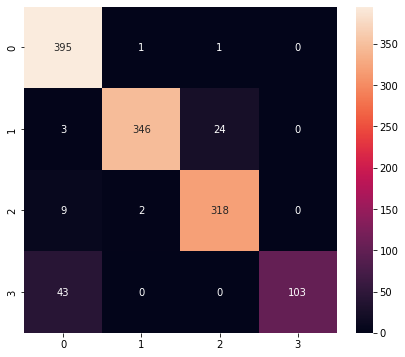

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       397
           1       0.99      0.93      0.96       373
           2       0.93      0.97      0.95       329
           3       1.00      0.71      0.83       146

    accuracy                           0.93      1245
   macro avg       0.95      0.90      0.92      1245
weighted avg       0.94      0.93      0.93      1245



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Kawai\AppData\Local\Temp\tmp5_pbr1z5\assets


6416

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.7861420e-01 9.1391869e-02 6.8559915e-05 2.2992545e-01]
0
